In [5]:
import pandas as pd
import numpy as np

from analyze_src.basic_data_inspection import  DataTypesInspector, SummaryStatisticsInspectionStartegy, DataInspector
from analyze_src.missing_values_analysis import SimpleMissingValuesAnalysis
# Set display options for better readability
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

In [6]:
# Load the dataset
data_path = '../extracted_data/AmesHousing.csv'
df = pd.read_csv(data_path)

In [7]:
# Step 1: Data inspection
#------------------------
# Initialize the data inspector with the DataFrame
data_inspector = DataInspector(DataTypesInspector())
data_inspector.execute_inspection(df)


Data Types and Non-Null counts
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-nu

In [8]:
# switch the startegy to summary statistics
data_inspector.set_strategy(SummaryStatisticsInspectionStartegy())
# Execute the inspection again to get summary statistics
data_inspector.execute_inspection(df)


Summary Statistics (Numerical Features):
            Order           PID  MS SubClass  Lot Frontage       Lot Area  \
count  2930.00000  2.930000e+03  2930.000000   2440.000000    2930.000000   
mean   1465.50000  7.144645e+08    57.387372     69.224590   10147.921843   
std     845.96247  1.887308e+08    42.638025     23.365335    7880.017759   
min       1.00000  5.263011e+08    20.000000     21.000000    1300.000000   
25%     733.25000  5.284770e+08    20.000000     58.000000    7440.250000   
50%    1465.50000  5.354536e+08    50.000000     68.000000    9436.500000   
75%    2197.75000  9.071811e+08    70.000000     80.000000   11555.250000   
max    2930.00000  1.007100e+09   190.000000    313.000000  215245.000000   

       Overall Qual  Overall Cond   Year Built  Year Remod/Add  Mas Vnr Area  \
count   2930.000000   2930.000000  2930.000000     2930.000000   2907.000000   
mean       6.094881      5.563140  1971.356314     1984.266553    101.896801   
std        1.411026     


Missing Values Count by Column:
Lot Frontage       490
Alley             2732
Mas Vnr Type      1775
Mas Vnr Area        23
Bsmt Qual           80
Bsmt Cond           80
Bsmt Exposure       83
BsmtFin Type 1      80
BsmtFin SF 1         1
BsmtFin Type 2      81
BsmtFin SF 2         1
Bsmt Unf SF          1
Total Bsmt SF        1
Electrical           1
Bsmt Full Bath       2
Bsmt Half Bath       2
Fireplace Qu      1422
Garage Type        157
Garage Yr Blt      159
Garage Finish      159
Garage Cars          1
Garage Area          1
Garage Qual        159
Garage Cond        159
Pool QC           2917
Fence             2358
Misc Feature      2824
dtype: int64

Visualizing Missing Values...


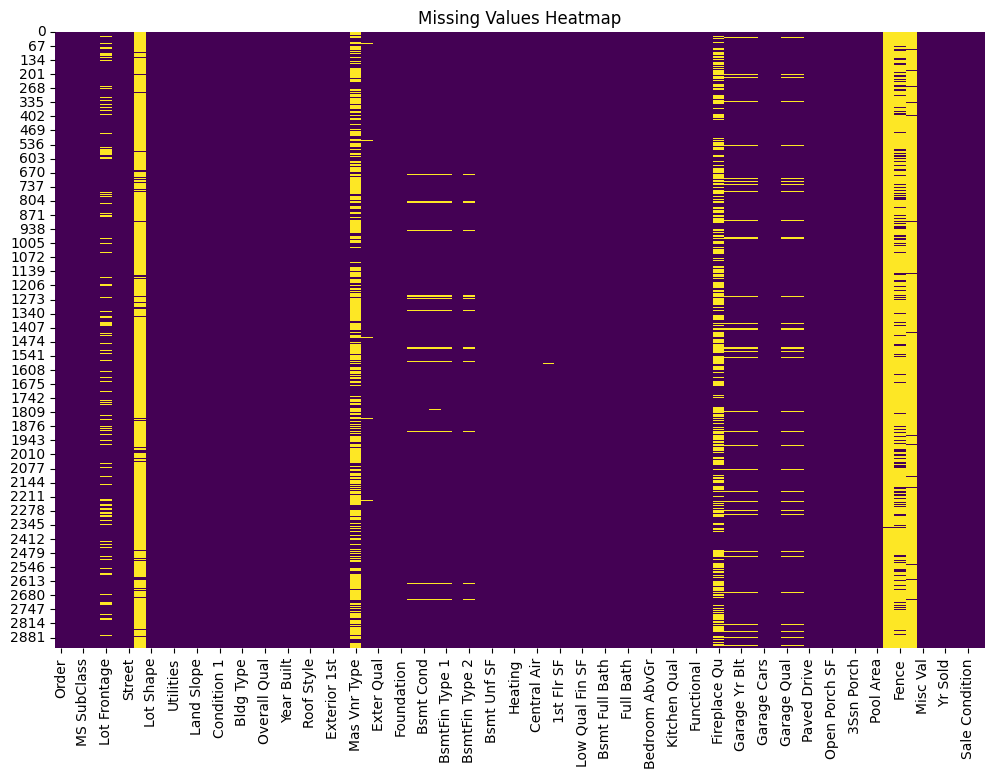

In [9]:
#step 2 missing values
#------------------------
missing_values_analyzer = SimpleMissingValuesAnalysis()
missing_values_analyzer.analyze(df)

# Missing Values Heatmap Insights

#### **1. Color Interpretation**
- **Yellow:** Indicates missing values. The more yellow visible in a column, the more missing data is present for that feature.
- **Purple (or dark color):** Represents non-missing values. Columns mostly purple have most of their data present.

#### **2. Identifying Columns with Missing Data**
- Look for columns with large yellow areas – these have higher proportions of missing data.
  - For example, in your heatmap, columns like `Lot Frontage`, `Mas Vnr Type`, `Mas Vnr Area`, `Garage Yr Blt`, and `Pool Area` show substantial yellow, indicating missing values.

#### **3. Distribution Patterns**
- **Random distribution:** Yellow marks scattered randomly suggest missing data is spread without pattern.
- **Structured missingness:** Clusters of yellow in certain rows or columns indicate non-random missingness, possibly due to data collection issues or inapplicability of features for some rows.

#### **4. Severity and Impact**
- Columns with more yellow have higher missing value proportions, potentially affecting model performance if not handled properly.
  - Some columns may have minimal missing data, while others have substantial missingness. Decide whether to impute, drop, or handle these features differently based on their importance and missingness level.
